Pilih data yang ingin digunakan sebagai acuan (Nb. Secara default akan memilih pilihan 1):
1. Tekanan Darah dan Denyut Jantung Maksimal
2. Tekanan Darah dan Kolesterol
3. Kolesterol dan Denyut Jantung Maksimal
Pilih sesuai nomor : 1
Input nilai Tekanan Darah: 110
Input nilai Denyut Jantung Maksimal: 110


Dataset Model ini memberikan akurasi sebesar 70.53658536585365
Dataset Model ini memberikan hasil berupa fungsi linear dengan metode Logistic Regressions
[-4.35907989 -0.01702984  0.04448146]

Berdasarkan hasil regresi dataset model
Kamu tidak memiliki gejala yang mengindikasi penyakit jantung!


  NIT   NF   F                       GTG
    0    1  6.931471805599454E-01   4.68418620E+01
    1    3  6.894971994217705E-01   2.54625284E+01
    2    5  6.006745082083206E-01   3.46617572E-01
    3    7  5.987268344547136E-01   6.21288559E-03
    4    9  5.986496637679615E-01   2.13790230E-01
    5   11  5.966309271752996E-01   1.80293921E+01
    6   13  5.923583835616786E-01   4.24107959E-01
    7   15  5.920981251770011E-01   5.99354901E-01
    8   17  5.916452050520787E-01   5.24389707E+00
    9   19  5.862528656851080E-01   1.18824906E-01
   10   21  5.862508588544605E-01   2.94835341E-02
   11   23  5.862098482411155E-01   6.40168236E-03
   12   25  5.862080356894734E-01   2.04669214E-02
   13   27  5.860695380661937E-01   7.94940145E-04
tnc: fscale = 35.4677
   14   29  5.860694868781264E-01   3.15125577E-05
   15   31  5.860690727091081E-01   1.60473571E-06
tnc: fscale = 789.402
tnc: |fn-fn-1] = 1.29078e-09 -> convergence
   16   33  5.860690714183286E-01   1.73234137E-05
tnc:

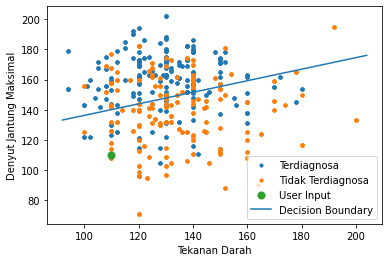

In [6]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pyparsing import line
from scipy.optimize import fmin_tnc

class LogisticRegressionUsingGD:

    # fungsi sigmoid, untuk menentukan hasil akhir (1 atau 0)
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    # perkalian inner-product antara vektor x dan vektor theta 
    @staticmethod
    def net_input(theta, x):
        return np.dot(x, theta)

    # menghitung probabilitas suatu data akan dikategorikan kedalam kelas apa
    def probability(self, theta, x):
        return self.sigmoid(self.net_input(theta, x))

    # menghitung "harga" komputasi untuk seluruh training samples
    def cost_function(self, theta, x, y):
        m = x.shape[0]
        total_cost = -(1 / m) * np.sum(
            y * np.log(self.probability(theta, x)) + (1 - y) * np.log(
                1 - self.probability(theta, x)))
        return total_cost

    # menghitung gradien dari cost_fucntion pada titik theta
    def gradient(self, theta, x, y):
        m = x.shape[0]
        gradient = (1 / m) * np.dot(x.T, self.sigmoid(self.net_input(theta, x)) - y) 
        return gradient

    def fit(self, x, y, theta):      
        """tujuan fungsi ini adalah melatih model dengan cara mengolah data
        
        scipy.fimn_tnc digunakan untuk mencari nilai minimum dari suatu fungsi dengan cara menurunkannya
        argumen dari fungsi ini adalah:
            1) func : merupakan fungsi yang ingin kita minimalkan
            2) x0 : nilai awal dari parameter
            3) fprime : gradien dari fungsi 'func'
            4) args : argumen yang dimasukan kedalam fungsi 
        

        Parameters:
        x: array-like, shape = [n_samples, n_features], berisikan training samples
        y: array-like, shape = [n_samples, n_target_values], berisikan target classes
        theta: initial weights

        Returns:        
        sel f: instance dari objek self"""

        opt_weights = fmin_tnc(func=self.cost_function, x0=theta, fprime=self.gradient,args=(x, y.flatten()))
        self.w_ = opt_weights[0]
        return self

    def predict(self, x):
        """fungsi ini memprediksikan kategori class

        Parameters:        
        x: array-like, shape = [n_samples, n_features], berisikan test samples

        Returns:      
        predicted class labels"""
        
        theta = self.w_[:, np.newaxis]
        return self.probability(theta, x)

    def accuracy(self, x, actual_classes, probab_threshold=0.5):
        """menghitung keakuratan dari pengelompokan kelas        

        Parameters:        
        x: array-like, shape = [n_samples, n_features], raining samples
        actual_classes : hasil klasifikasi class sesungguhnya yang terdapat dalam dataset
        probab_threshold: threshold/cutoff untuk mengkategorisasikan sampel ke kelas-kelas yang berbeda

        Returns:
        accuracy: akurasi dari model"""
        
        predicted_classes = (self.predict(x) >= probab_threshold).astype(int)
        predicted_classes = predicted_classes.flatten()
        accuracy = np.mean(predicted_classes == actual_classes)
        return accuracy * 100
    
def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df

def linEq(x1,x2,y1,y2):
    grad = (y2-y1)/(x2-x1)
    c = y1 - (grad * x1)
    return grad, c

if __name__ == "__main__":
    # memilih inputan data
    print("==========================================================================================")
    print("Pilih data yang ingin digunakan sebagai acuan (Nb. Secara default akan memilih pilihan 1):")
    print("1. Tekanan Darah dan Denyut Jantung Maksimal")
    print("2. Tekanan Darah dan Kolesterol")
    print("3. Kolesterol dan Denyut Jantung Maksimal")

    user_data_choice = input("Pilih sesuai nomor : ")

    if(user_data_choice == '3'):
        data_path = "heart3"
        faktor_x = "Kolesterol"
        faktor_y = "Denyut Jantung Maksimal"
    elif(user_data_choice == '2'):
        data_path = "heart2"
        faktor_x = "Tekanan Darah"
        faktor_y = "Kolesterol"
    else:
        data_path = "heart4"
        faktor_x = "Tekanan Darah"
        faktor_y = "Denyut Jantung Maksimal"
    
    user_input_x = float(input(f"Input nilai {faktor_x}: "))
    user_input_y = float(input(f"Input nilai {faktor_y}: "))

    print("==========================================================================================\n")
        
    data = load_data(f"data/{data_path}.txt", None)

    # X berisikan nilai dari feature, terdiri dari semua kolom kecuali kolom terakhir
    X = np.array(data.iloc[:, :-1])

    # Y berisikan nilai target (yes or no), terdiri dari data di kolom terkhir
    y = np.array(data.iloc[:, -1])
    
    # kelompokan data-data yang terdiagnosa
    diagnosed = data.loc[y == 1]

    # kelompokan data-data yang tidak terdiagnosa
    not_diagnosed = data.loc[y == 0]

    # plot
    plt.scatter(diagnosed.iloc[:, 0], diagnosed.iloc[:, 1], s=10, label='Terdiagnosa')
    plt.scatter(not_diagnosed.iloc[:, 0], not_diagnosed.iloc[:, 1], s=10, label='Tidak Terdiagnosa')

    # menyiapkan data untuk membuat model
    X = np.c_[np.ones((X.shape[0], 1)), X]
    y = y[:, np.newaxis]
    theta = np.zeros((X.shape[1], 1))

    # menghitung logistic regression dengan cara menentukan nilai minimum fungsi dengan turunan gradien 
    model = LogisticRegressionUsingGD()
    model.fit(X, y, theta)
    accuracy = model.accuracy(X, y.flatten())
    parameters = model.w_
    print("\n==========================================================================================")
    print("Dataset Model ini memberikan akurasi sebesar {}".format(accuracy))
    print("Dataset Model ini memberikan hasil berupa fungsi linear dengan metode Logistic Regressions")
    print(parameters)


    x_values = [np.min(X[:, 1] - 2), np.max(X[:, 2] + 2)]
    y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]
    grad, c = linEq(x_values[0], y_values[0], x_values[1], y_values[1])
    y_predic = grad * user_input_x + c

    if(y_predic <= user_input_y):
        print("\nBerdasarkan hasil regresi dataset model\nKamu terindikasi memiliki penyakit jantung!")
    else:
        print("\nBerdasarkan hasil regresi dataset model\nKamu tidak memiliki gejala yang mengindikasi penyakit jantung!")
    print("==========================================================================================")

    plt.scatter(user_input_x, user_input_y, s=50, label='Input User')
    plt.plot(x_values, y_values, label='Batas Keputusan')
    plt.xlabel(f'{faktor_x}')
    plt.ylabel(f'{faktor_y}')
    plt.legend()
    plt.show()
